<a href="https://colab.research.google.com/github/iborgstedt2848/ML_G84_G2_P2/blob/main/segunda_practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segunda Práctica

**Autores:**

---


Luis Enrique Valero Montero - Gr. 85 - 100495982

Isabelle Borgstedt - Gr. 84 - 100559990

# Eligiendo el mejor scaler a traves de PCA:

Primero, vamos a visualizar los diferentes scalers: MinMaxScaler, StandardScaler, y RobustScaler usando gráficos que muestran los clusters. Después, podemos elegir el mejor basado en las métricas y los gráficos.

          PC1       PC2  class
0    0.222314 -0.451988      1
1    0.132084 -1.217733      1
2   -0.028215 -1.368021      1
3   -0.139683 -1.337110      1
4    0.881124 -1.364596      1
..        ...       ...    ...
205 -1.080211 -0.696041      3
206 -1.675987  0.056040      3
207 -0.798936  0.641682      3
208 -1.436453 -0.116253      3
209 -1.168643  0.217147      3

[210 rows x 3 columns]


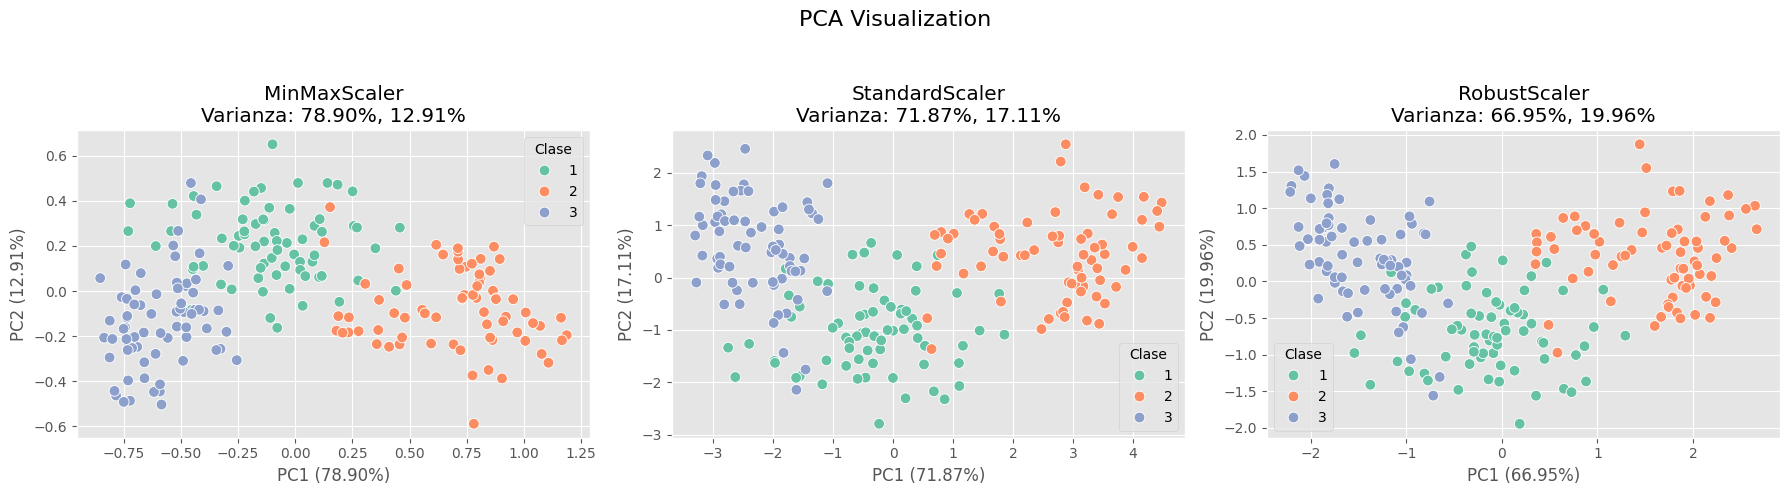

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# cargar los datos
df = pd.read_csv("semillas.csv")
X = df.drop(columns=['clase'])
y = df['clase']

# semilla para la reproducibilidad
random_seed = 559990

# dictionario de scalers
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler()
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('PCA Visualization', fontsize=16)

# probar cada scaler y realizar PCA
for ax, (name, scaler) in zip(axes, scalers.items()):
    pipeline = Pipeline([
        ('scaler', scaler),
        ('pca', PCA(n_components=2, random_state=random_seed))
    ])

    X_pca = pipeline.fit_transform(X)
    pca = pipeline.named_steps['pca']
    explained_variance = pca.explained_variance_ratio_

    pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    pca_df['class'] = y

    sns.scatterplot(
        data=pca_df,
        x='PC1', y='PC2',
        hue='class',
        palette='Set2',
        ax=ax,
        s=60
    )

    ax.set_title(f"{name}\nVarianza: {explained_variance[0]:.2%}, {explained_variance[1]:.2%}")
    ax.set_xlabel(f"PC1 ({explained_variance[0]:.2%})")
    ax.set_ylabel(f"PC2 ({explained_variance[1]:.2%})")
    ax.legend().set_title('Clase')

# para demostrar la reduccion de dimensionalidad que nos hico PCA
print(pca_df)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()



También podemos calcular la efectivdad de cada scaler con las métricas Silhouette Score, Davies-Bounldin Index, y Calinski Harabasz score para obtener una respuesta más objetiva del rendimiento de los scalers.

In [59]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans

results = []

for name, scaler in scalers.items():
    pipeline = Pipeline([
        ('scaler', scaler),
        ('pca', PCA(n_components=2, random_state=random_seed))
    ])

    X_scaled_pca = pipeline.fit_transform(X)

    # correr kmeans con k=3
    kmeans = KMeans(n_clusters=3, random_state=random_seed)
    labels = kmeans.fit_predict(X_scaled_pca)

    # evaluar las métricas
    silhouette = silhouette_score(X_scaled_pca, labels)
    db_index = davies_bouldin_score(X_scaled_pca, labels)
    ch_index = calinski_harabasz_score(X_scaled_pca, labels)

    results.append({
        'Scaler': name,
        'Silhouette Score': silhouette,
        'Davies-Bouldin Index': db_index,
        'Calinski-Harabasz Index': ch_index
    })

# convertirse en df
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='Silhouette Score', ascending=False))


           Scaler  Silhouette Score  Davies-Bouldin Index  \
0    MinMaxScaler          0.503160              0.697186   
1  StandardScaler          0.493430              0.706673   
2    RobustScaler          0.489777              0.699397   

   Calinski-Harabasz Index  
0               464.844797  
1               397.301078  
2               360.897259  


Silhouette Score: Mide qué tan bien se ajusta un punto a su propio clúster en comparación con otros clusters. Los valores cercanos a 1 indican un mejor agrupamiento.

Davies-Bouldin Index: Mide la similitud promedio entre cada cluster y el cluster más similar. Cuanto menor sea el valor, mejor.

Calinski-Harabasz Index: Relación entre la dispersión entre clusters y la dispersión interna de los clusters. Cuanto mayor sea el valor, mejor.

Todos las métricas muestran que MinMaxScaler es el mejor porque tiene el Silhouette Score más alto, el Davies-Bouldin Index más bajo, t el Calinski-Harabasz Index más alto.

Ahora que sabemos cual es el mejor scaler para elegir, MinMax, vamos a recrear el dataframe final que va a ser utilizado en nuestros algoritmos de clustering.

In [60]:
mejor_scaler = MinMaxScaler()
pipeline = Pipeline([
    ('scaler', mejor_scaler),
    ('pca', PCA(n_components=2, random_state=random_seed))
])

X_scaled_pca = pipeline.fit_transform(X)

pca_df = pd.DataFrame(X_scaled_pca, columns=['PC1', 'PC2'])
pca_df['class'] = y

X_pca = pca_df.drop(columns=['class'])

#visualizamos el dataframe
print(pca_df)
print(X_pca)

          PC1       PC2  class
0    0.075029  0.129691      1
1   -0.024301  0.364120      1
2   -0.149375  0.456497      1
3   -0.180881  0.440557      1
4    0.250589  0.441297      1
..        ...       ...    ...
205 -0.533393  0.201720      3
206 -0.703762 -0.059483      3
207 -0.336222 -0.085931      3
208 -0.606683 -0.014199      3
209 -0.498803 -0.054545      3

[210 rows x 3 columns]
          PC1       PC2
0    0.075029  0.129691
1   -0.024301  0.364120
2   -0.149375  0.456497
3   -0.180881  0.440557
4    0.250589  0.441297
..        ...       ...
205 -0.533393  0.201720
206 -0.703762 -0.059483
207 -0.336222 -0.085931
208 -0.606683 -0.014199
209 -0.498803 -0.054545

[210 rows x 2 columns]


# Clustering:

## K-Means:

Vamos a usar K-Means para agrupar los datos en clusters. Vamos a determinar cuántos clusters son necesarios para obtener un buen resultado usando clusters con codo y silueta.

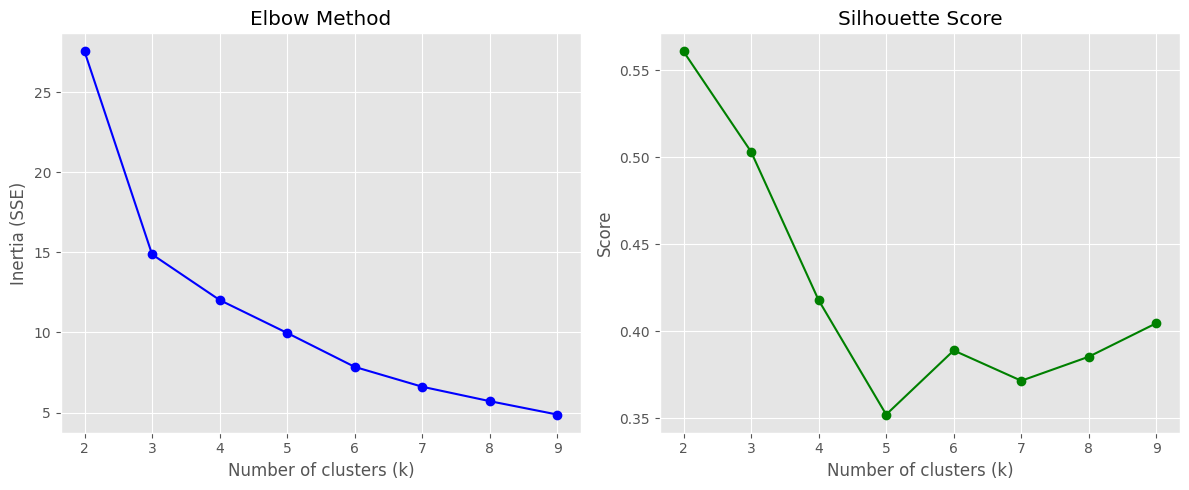

In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


inertia = []
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=559990)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'go-')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

Para clusters con codo, graficamos el número de clusters contra la inercia (SSE) que es una medida de la compacidad de los puntos de datos con respecto al centroide. Estamos buscando el "codo" del gráfico porque esto es el punto en lo que el reducción de SSE comienza a estabilizarse.

Para clusters con silueta, graficamos el número de clusters contra la puntuación que es una medida del ajuste de cada punto en su cluster (en comparación con otros clusteres). Estamos buscando números más grades, más cercos a uno.

Aunque k=2 es más cerco a uno según Silhouette score, elegimos k=3 para cumplir una solución intermedia entre los dos.

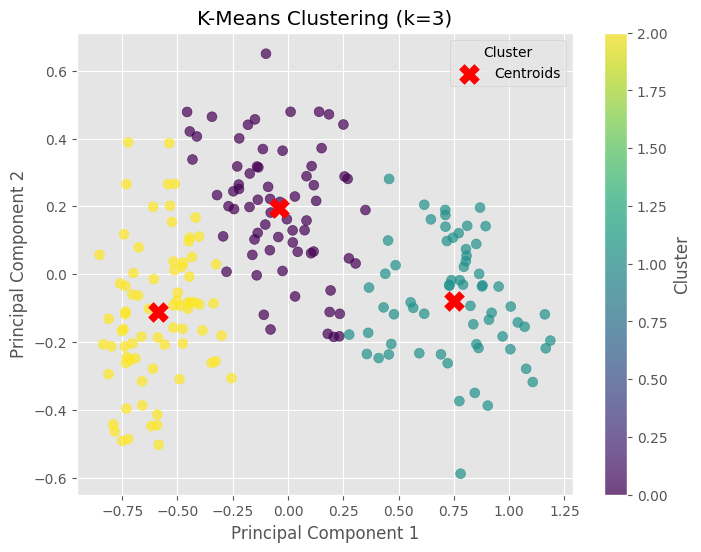

In [62]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# kmeans clustering
k_best = 3
kmeans = KMeans(n_clusters=k_best, random_state=559990)
kmeans.fit(pca_df[['PC1', 'PC2']])
kmeans_labels = kmeans.labels_
kmeans_centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pca_df['PC1'], pca_df['PC2'], c=kmeans_labels, cmap='viridis', s=50, alpha=0.7
)

plt.scatter(
    kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='red', s=200, marker='X', label='Centroids'
)

plt.title(f'K-Means Clustering (k={k_best})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label="Cluster")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## Hierarchical Clustering/Dendrograms:

Entonces vamos a usar Hierarchical Clustering/Dendrograms para agrupar los datos en clusters. Vamos a determinar cuántos clusters son necesarios para obtener un buen resultado usando funciones de linkage.

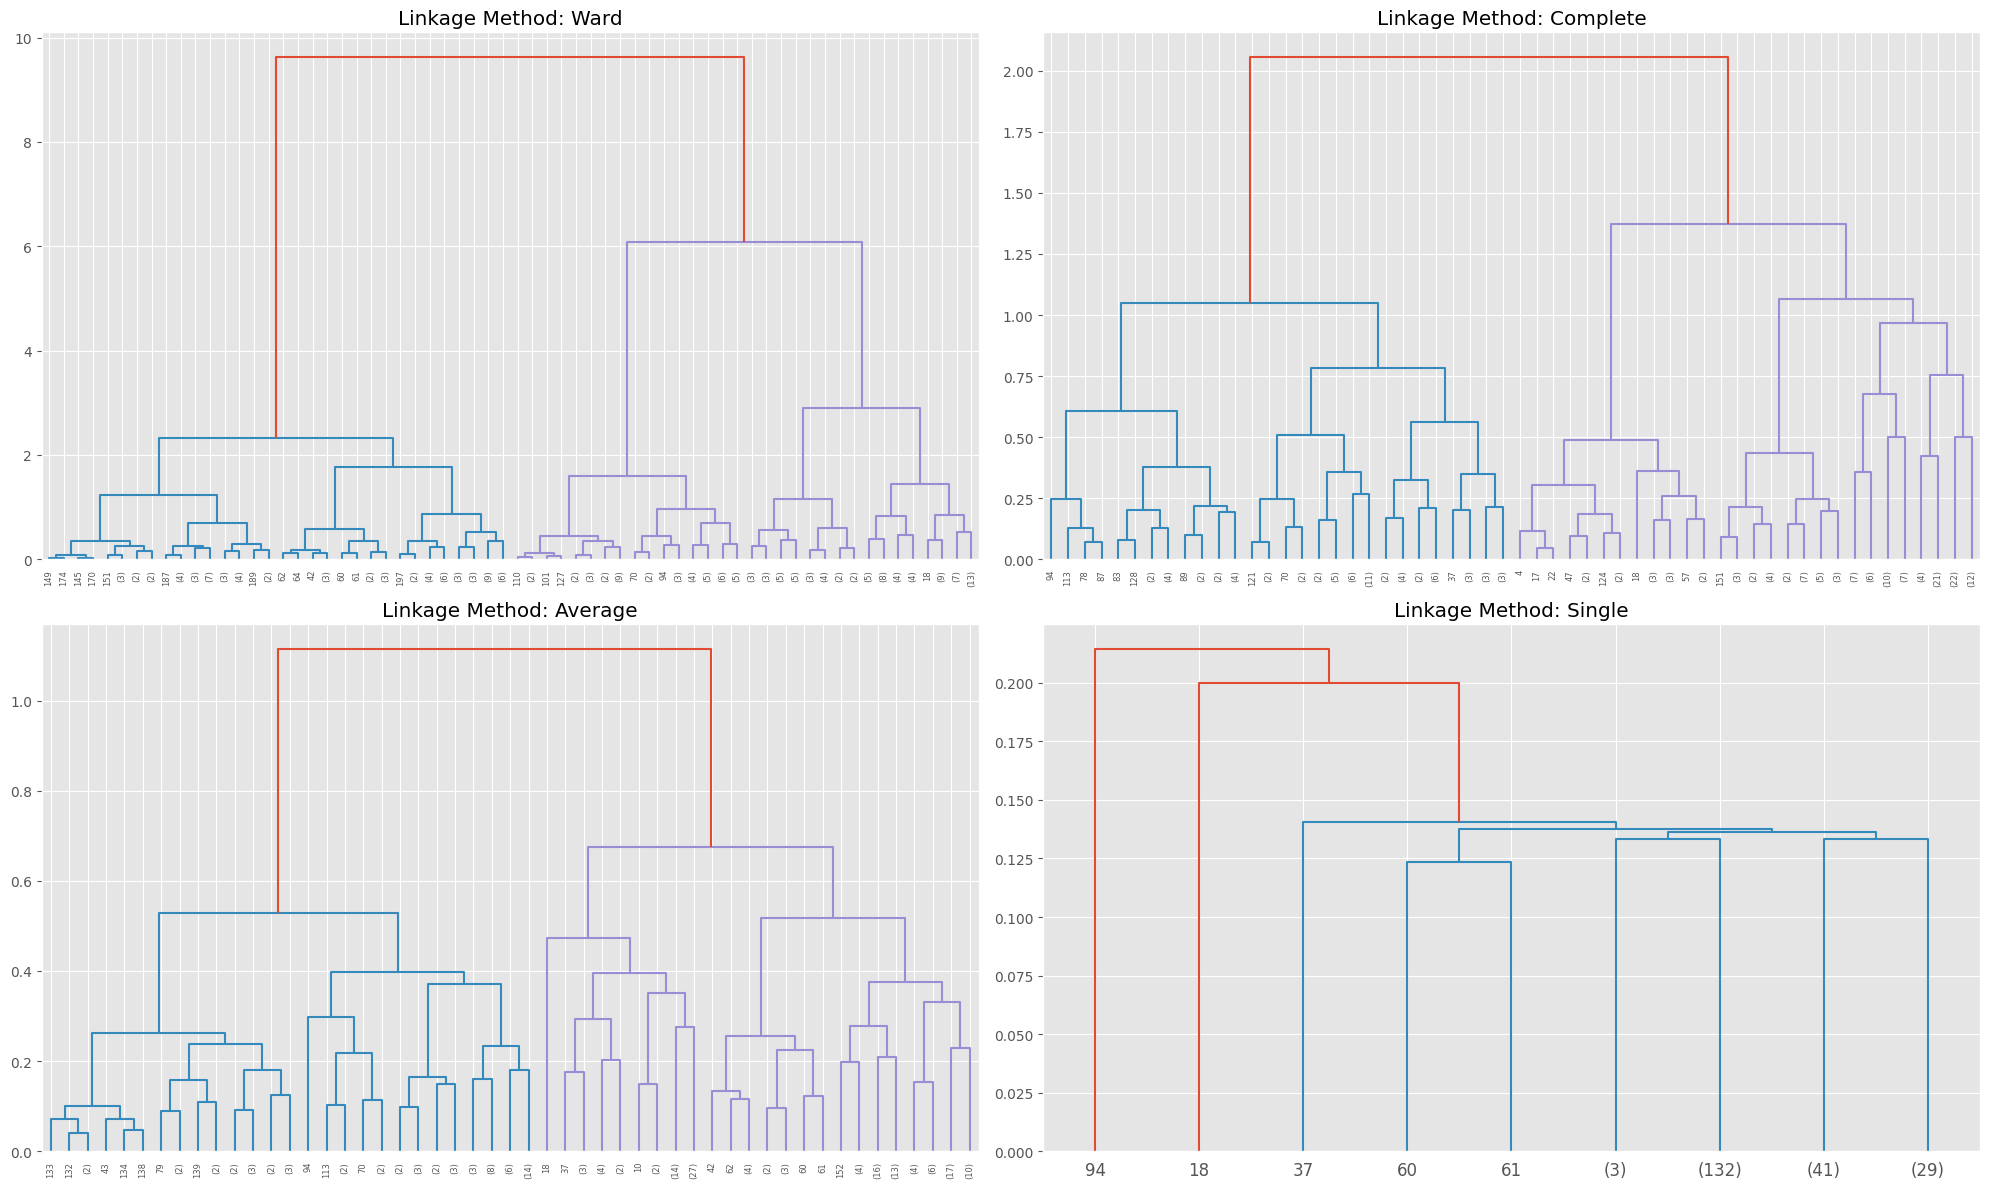

In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

linkage_methods = ['ward', 'complete', 'average', 'single']

# dendrograms
plt.figure(figsize=(20, 12))
for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i + 1)
    Z = linkage(pca_df[['PC1', 'PC2']], method=method)
    dendrogram(Z, truncate_mode='level', p=5)
    plt.title(f'Linkage Method: {method.capitalize()}')

plt.tight_layout()
plt.show()

Está claro que Ward es el mejor función de linkeage porque es el más simétrico. Ward reduce la varianza y a menudo su rendimiento es similar a K-Means.

También podemos ver que Ward crea 3 clusters. Hay un hueco vertical entre el nivel 3 y el nivel 2 que signifca que 3 es el mejor. El uso de 2 clusters combinaría clusters con demasiada separación.

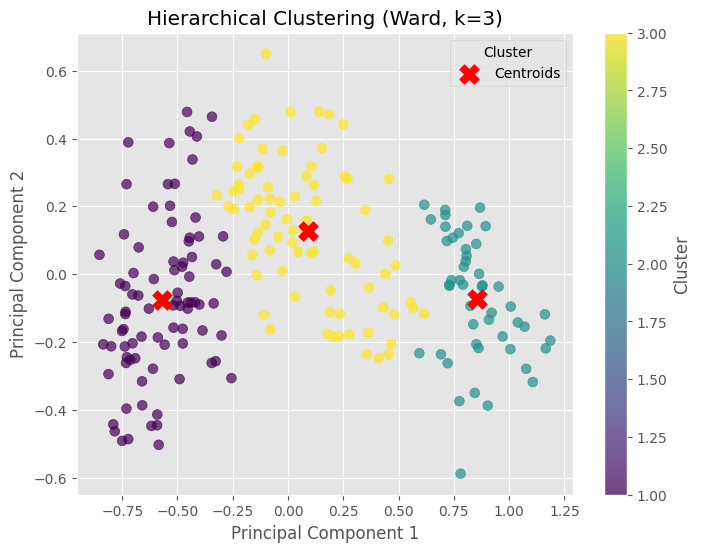

In [64]:
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
import numpy as np

# hierarchical clustering
Z = linkage(pca_df[['PC1', 'PC2']], method='ward')
hier_clusters = fcluster(Z, t=3, criterion='maxclust')

# calcular centroids
hier_centroids = np.array([pca_df[hier_clusters == i][['PC1', 'PC2']].mean(axis=0) for i in range(1, 4)])
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pca_df['PC1'],
    pca_df['PC2'],
    c=hier_clusters,
    cmap='viridis',
    s=50,
    alpha=0.7
)

plt.scatter(
    hier_centroids[:, 0],
    hier_centroids[:, 1],
    c='red', s=200,
    marker='X',
    label='Centroids'
)

plt.title('Hierarchical Clustering (Ward, k=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label="Cluster")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## DBSCAN:

Ahora vamos a trabajar con el algoritmo de clustering DBSCAN para identificar agrupaciones en nuestros datos no etiquetados.

DBSCAN es un algoritmo de agrupamiento no supervisado que agrupa puntos que estan muy juntos o forman una zona de alta densidad, y marca como outliers o ruido aquellos puntos que se encuentran en zonas de baja densidad. Este algoritmo se diferencia de K-Means porque no necesita que se especifique el numero de clusters, y tambien se diferencia de Clustering Jerarquico porque no construye una estructura en forma de arbol basada en distancias, sino que detecta directamente zonas densas para formar los clusters.

In [65]:
# importamos las librerias y modulos necesarios
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

El algortimo de DBSCAN tiene los hiperparametros eps, min_samples, metric, metric_params, algorithm, leaf_size, p, y n_jobs. En el proceso de hiperparameter tuning solo modificaremos y probaremos distintos valores de eps y min_samples ya que son los que mas influye el performance del algortimo.

El hiperparemetro eps se trata de la distance maxima o el radio del circulo q forma un "core point". Es decir que lo puntos que esten a una distancia menor que el eps, forman parte del circulo o del "neighbourhood". El hiperparametro min_samples es el minimo numero de puntos dentro del circulo o "neighbourhood" para que ese punto se considere como "core point".

Primero vamos a realizar el clustering con DBSCAN sin ajustar los hiperparametros eps y min_samples.

DBSCAN found 1 clusters and 0 noise points.


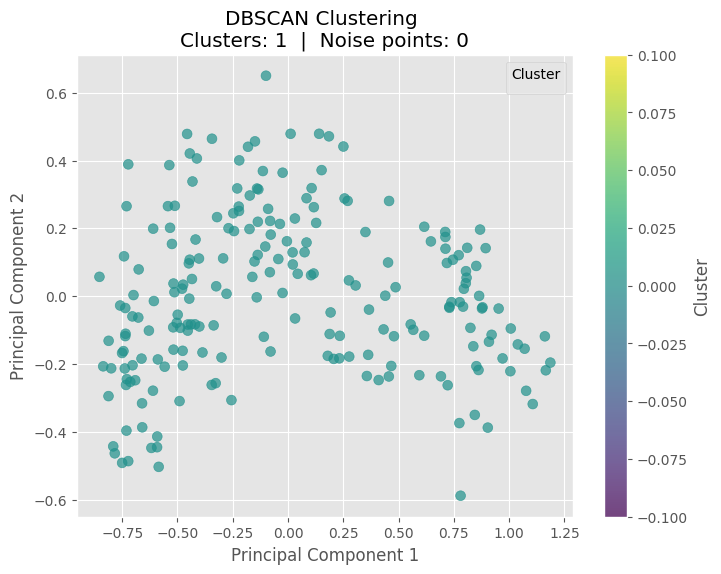

In [66]:
#sin HPO, valores de eps y min_samples de default
modelo_dbscan = DBSCAN()
modelo_dbscan.fit(X_pca)
labels = modelo_dbscan.labels_

#como DBSCAN no calcula los numeros de clusters lo tenemos que calcular nostros
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
#calculamos la cantidad de puntos que considera como outliers
n_noise = list(labels).count(-1)

# Print summary
print(f"DBSCAN found {n_clusters} clusters and {n_noise} noise points.")

def plot_dbscan(labels, n_clusters, n_noise):
  plt.figure(figsize=(8, 6))
  scatter = plt.scatter(
      X_pca['PC1'],
      X_pca['PC2'],
      c=labels,
      cmap='viridis',
      s=50,
      alpha=0.7
  )

  plt.title(f'DBSCAN Clustering \nClusters: {n_clusters}  |  Noise points: {n_noise}')
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.colorbar(scatter, label="Cluster")
  plt.legend(title='Cluster')  # No centroids in DBSCAN, legend is just a placeholder
  plt.grid(True)
  plt.show()
plot_dbscan(labels,n_clusters, n_noise)

Como podemos ver el DBSCAN default sin nigun ajust y con los valores default de eps = 0.5 y min_samples = 5, resulta en 1 solo cluster. Esto es porque como nos podemos dar cuento con el scale de PC1 y PC2, el valor 0.5 de eps es relativamente grande y entonces todos los puntos caen en el mismo cluster con ninguno siendo considerado como outlier o noise.

En lo siguiente vamos a generar un grafo de k-distance. Este grafo representara las distancias desde cada punto hasta su vecino numero min_samples, y usamos NearestNeighbors para calcular dichas distancias, lo cual nos ayuda a estimar un valor adecuado de eps para DBSCAN.

De esta forma podramos visualizar el punto codo o "elbow" que el y_value o la distancia sera nuestra referencia para el valor de eps. Esto no signfica que esta distancia sera la correcta ya que no solo lo estamos haciendo al ojo pero tambien esto es una heuristica y probablemente tendramos que probar mas valores alrededor del punto "elbow".

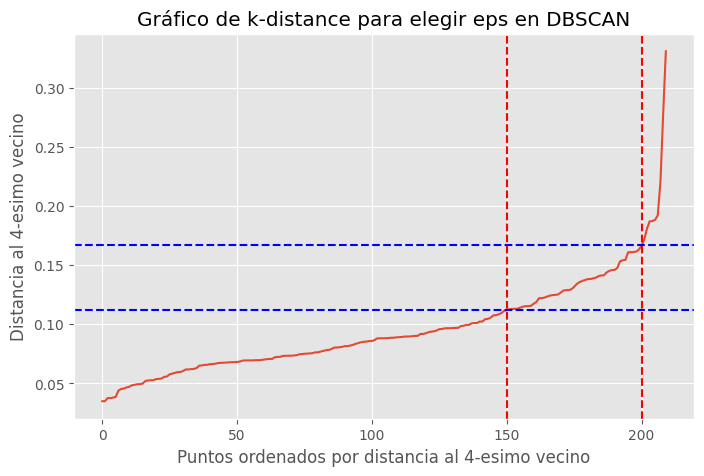

x_point1=x_point1=200 y_value1=0.16673162014672133
x_point2=x_point2=150 y_value2=0.11197766317083746


In [67]:
from sklearn.neighbors import NearestNeighbors
min_samples = 5

#usamos nearestneighbors para calcular las distancias
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X_pca)
distances, indices = nn.kneighbors(X_pca)

#ordenamos las distancias en un numpy array
sorted_distances = np.sort(distances[:, min_samples-1], axis=0)

x_point1 = 200
y_value1 = sorted_distances[x_point1]
x_point2 = 150
y_value2 = sorted_distances[x_point2]

#dibuajmos las distancias sorteadas
plt.figure(figsize=(8, 5))
plt.plot(sorted_distances)
plt.xlabel('Puntos ordenados por distancia al {}-esimo vecino'.format(min_samples-1))
plt.ylabel('Distancia al {}-esimo vecino'.format(min_samples-1))
plt.title('Gráfico de k-distance para elegir eps en DBSCAN')
plt.axvline(x=x_point1, color='r', linestyle='--')
plt.axhline(y=y_value1, color='b', linestyle='--')
plt.axvline(x=x_point2, color='r', linestyle='--')
plt.axhline(y=y_value2, color='b', linestyle='--')
plt.grid(True)
plt.show()
print(f'x_point1={x_point1=} y_value1={y_value1}')
print(f'x_point2={x_point2=} y_value2={y_value2}')

Como podemos ver en el grafo el punto "elbow" esta aproximadamente en el punto 200 con un valor de distancia de 0.1667. Utilizaremos este valor como maximo de los valores que probaremos. Como minimo del rango utilizaremos el y_value del punto 150 que es 0.1119. Vamos a probar valores entre estos dos valores en pasos o incrimentos de 0.0005.

Para los valores de min_sample probaremos valores enteros de 3 a 7.

Vamos a evaluar cada combinacion de estos hiperparametros como si fuese un grid search y al final nos quedaremos con el que mejor silhouette score nos de.

In [68]:
#definimos los valores de eps y min_values que probaremos
eps_values = np.arange(0.1119, 0.1667, 0.0005)
min_samples = [3, 4, 5, 6, 7]
count = 0
clusters = 0
best_score = -1
best_params = None

# doble for loop para probar todas las combinaciones posibles.
for eps in eps_values:
  for min_sample in min_samples:
      modelo = DBSCAN(eps=eps, min_samples=min_sample)
      labels = modelo.fit_predict(X_pca)
      n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
      n_noise = list(labels).count(-1)

      if n_clusters > 1:
        score = silhouette_score(X_pca, labels)
        print(f"eps = {eps:.4f} min_samples = {min_sample} → Clusters: {n_clusters}, Noise: {n_noise}")
        if score > best_score: # nos quedamos con el que mejore score nos de
          best_score = score
          best_params = (eps, min_sample)
          clusters = n_clusters
      count += 1

print(f"Total de iteraciones: {count}")
print(f"Mejor puntaje: {best_score}")
print(f"Mejores parámetros: eps = {best_params[0]:.4f}, min_samples = {best_params[1]}")
print(f"Numero de clusters: {clusters}")
old_score = best_score


eps = 0.1119 min_samples = 3 → Clusters: 5, Noise: 12
eps = 0.1119 min_samples = 4 → Clusters: 3, Noise: 20
eps = 0.1119 min_samples = 5 → Clusters: 4, Noise: 26
eps = 0.1119 min_samples = 6 → Clusters: 4, Noise: 40
eps = 0.1119 min_samples = 7 → Clusters: 4, Noise: 58
eps = 0.1124 min_samples = 3 → Clusters: 5, Noise: 12
eps = 0.1124 min_samples = 4 → Clusters: 3, Noise: 20
eps = 0.1124 min_samples = 5 → Clusters: 4, Noise: 26
eps = 0.1124 min_samples = 6 → Clusters: 4, Noise: 40
eps = 0.1124 min_samples = 7 → Clusters: 4, Noise: 58
eps = 0.1129 min_samples = 3 → Clusters: 5, Noise: 12
eps = 0.1129 min_samples = 4 → Clusters: 3, Noise: 20
eps = 0.1129 min_samples = 5 → Clusters: 4, Noise: 26
eps = 0.1129 min_samples = 6 → Clusters: 4, Noise: 40
eps = 0.1129 min_samples = 7 → Clusters: 4, Noise: 58
eps = 0.1134 min_samples = 3 → Clusters: 5, Noise: 12
eps = 0.1134 min_samples = 4 → Clusters: 3, Noise: 20
eps = 0.1134 min_samples = 5 → Clusters: 4, Noise: 26
eps = 0.1134 min_samples = 6

Despues de 550 iteraciones que son 550 modelos evaluados, nos da que los mejores valores de eps es 0.1334 y de min_samples es 3.

Lo curioso es que nos da solo 2 clusters, cuando sabemos del dataset que hay que tener 3 clusters uno por cada clase. Tambien es lo que nos da K-means y Hierarchical. Aunque es la configuracion que mejor score nos de, queremos filtrar y evaluar los que nos dan 3 clusters.

In [69]:
count = 0
best_score = -1
best_params = None

for eps in eps_values:
  for min_sample in min_samples:
      modelo = DBSCAN(eps=eps, min_samples=min_sample)
      labels = modelo.fit_predict(X_pca)
      n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
      n_noise = list(labels).count(-1)

      if n_clusters == 3:
        score = silhouette_score(X_pca, labels)
        print(f"eps = {eps:.4f} min_samples = {min_sample} → Clusters: {n_clusters}, Noise: {n_noise}")
        if score > best_score:
          best_score = score
          best_params = (eps, min_sample)
        count += 1

print(f"Total de iteraciones: {count}")
print(f"Mejor puntaje: {best_score}")
print(f"Mejores parámetros: eps = {best_params[0]:.4f}, min_samples = {best_params[1]}")
print(f"Diferencia de silhouette score: {(old_score - best_score):.4f}")


eps = 0.1119 min_samples = 4 → Clusters: 3, Noise: 20
eps = 0.1124 min_samples = 4 → Clusters: 3, Noise: 20
eps = 0.1129 min_samples = 4 → Clusters: 3, Noise: 20
eps = 0.1134 min_samples = 4 → Clusters: 3, Noise: 20
eps = 0.1139 min_samples = 4 → Clusters: 3, Noise: 20
eps = 0.1144 min_samples = 4 → Clusters: 3, Noise: 20
eps = 0.1149 min_samples = 4 → Clusters: 3, Noise: 20
eps = 0.1154 min_samples = 4 → Clusters: 3, Noise: 20
eps = 0.1154 min_samples = 5 → Clusters: 3, Noise: 24
eps = 0.1159 min_samples = 4 → Clusters: 3, Noise: 19
eps = 0.1159 min_samples = 5 → Clusters: 3, Noise: 23
eps = 0.1164 min_samples = 4 → Clusters: 3, Noise: 19
eps = 0.1164 min_samples = 5 → Clusters: 3, Noise: 23
eps = 0.1169 min_samples = 4 → Clusters: 3, Noise: 19
eps = 0.1169 min_samples = 5 → Clusters: 3, Noise: 23
eps = 0.1174 min_samples = 4 → Clusters: 3, Noise: 19
eps = 0.1174 min_samples = 5 → Clusters: 3, Noise: 23
eps = 0.1179 min_samples = 4 → Clusters: 3, Noise: 19
eps = 0.1179 min_samples = 5

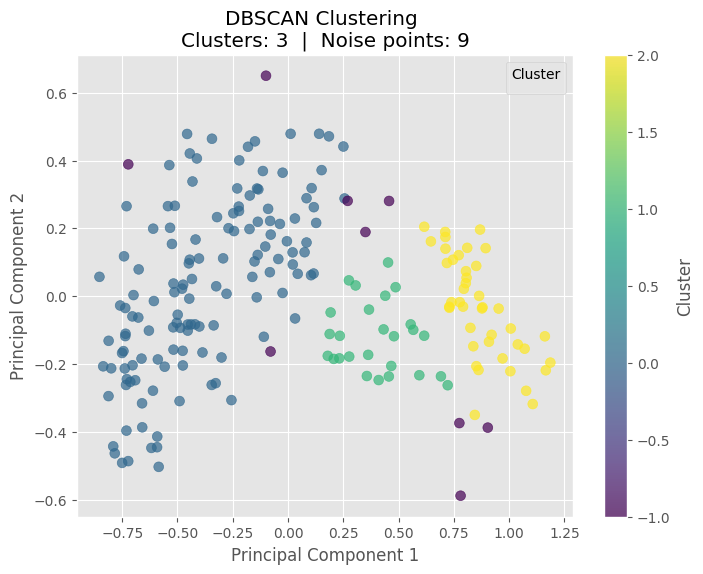

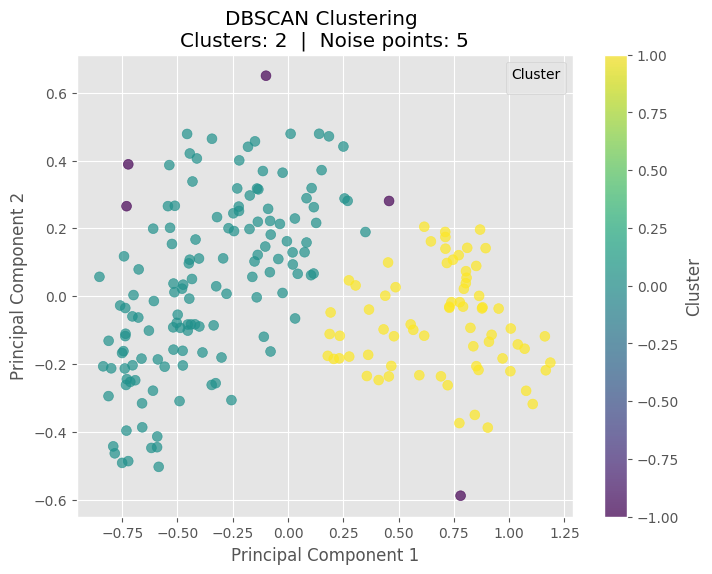

In [70]:
modelo1 = DBSCAN(
    eps = 0.1379,
    min_samples = 5
)
modelo2 = DBSCAN(
    eps = 0.1334,
    min_samples = 3
)

modelo1.fit(X_pca)
labels1 = modelo1.labels_
modelo2.fit(X_pca)
labels2 = modelo2.labels_

#como DBSCAN no calcula los numeros de clusters lo tenemos que calcular nostros
n_clusters1 = len(set(labels1)) - (1 if -1 in labels1 else 0)
n_clusters2 = len(set(labels2)) - (1 if -1 in labels2 else 0)
#calculamos la cantidad de puntos que considera como outliers
n_noise1 = list(labels1).count(-1)
n_noise2 = list(labels2).count(-1)

plot_dbscan(labels1, n_clusters1, n_noise1)
plot_dbscan(labels2, n_clusters2, n_noise2)

Aqui podemos ver que hay 156 modelos que nos dan 3 cluster. Entre ellos el que mejor score nos da es con la configuracion de eps = 0.1379 y min_sample = 5. La diferencia entre el mejor modelo la parte anterior que daba 2 clusters y la mejor que da 3 clusters es de 0.0562. Esta diferencia statisticamente es notable en la calidad de los clusters. Tambien se puede visualizar la diferencia con los 2 graficos de arriba. El primero es el que da 3 clusters y el segundo el que da 2 cluster. Podemos ver que en el de 2 clusters hay menos outliers.

DBSCAN found 3 clusters and 9 noise points.


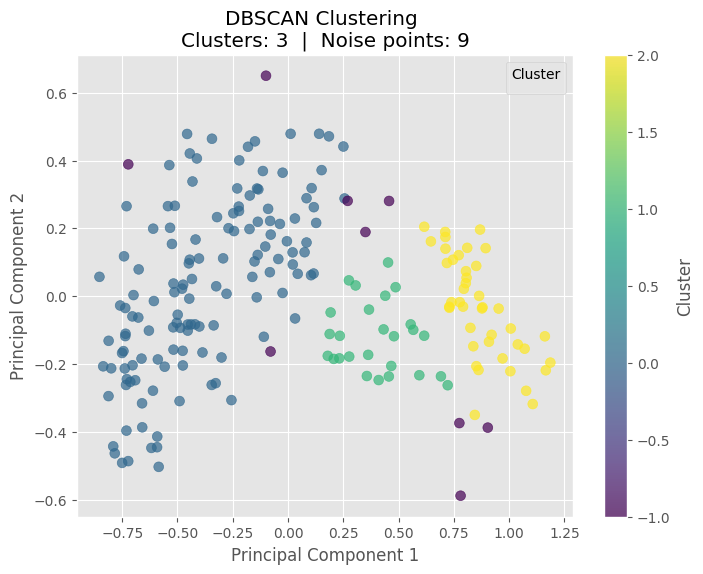

In [71]:
modelo_dbscan = DBSCAN(
    eps = 0.1379,
    min_samples = 5
)

modelo_dbscan.fit(X_pca)
labels = modelo_dbscan.labels_

#como DBSCAN no calcula los numeros de clusters lo tenemos que calcular nostros
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
#calculamos la cantidad de puntos que considera como outliers
n_noise = list(labels).count(-1)

print(f"DBSCAN found {n_clusters} clusters and {n_noise} noise points.")

plot_dbscan(labels, n_clusters, n_noise)

Nosotros decidimos de sacrificar el silhouette score y quedarnos con el modelo que nos da 3 clusters como modelo final para poder comparar mejor entre K-Means y Hierarchical.

# Análisis:

## Una Comparación:

In [72]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

pca_df = pca_df[['PC1', 'PC2']]

# establecer número de clusters = 3
kmeans = KMeans(n_clusters=3, random_state=559990)
kmeans_labels = kmeans.fit_predict(pca_df)

# hierarchical clustering: n_clusters = 3 y ward
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_labels = hc.fit_predict(pca_df)

# dbscan clustering: eps = 0.1379 y min_samples = 5
modelo_dbscan = DBSCAN(
    eps = 0.1379,
    min_samples = 5
)
dbscan_labels = modelo_dbscan.fit_predict(pca_df)

def evaluate_clustering(X, labels, name):
    sil = silhouette_score(X, labels)
    db = davies_bouldin_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    print(f"{name} Clustering:")
    print(f"Silhouette Score: {sil:.3f}")
    print(f"Davies–Bouldin Index: {db:.3f}")
    print(f"Calinski–Harabasz Score: {ch:.3f}")
    print("-" * 40)

evaluate_clustering(pca_df, kmeans_labels, "K-Means")
evaluate_clustering(pca_df, hierarchical_labels, "Hierarchical")
evaluate_clustering(pca_df, dbscan_labels, "DBSCAN")


K-Means Clustering:
Silhouette Score: 0.503
Davies–Bouldin Index: 0.697
Calinski–Harabasz Score: 464.845
----------------------------------------
Hierarchical Clustering:
Silhouette Score: 0.471
Davies–Bouldin Index: 0.729
Calinski–Harabasz Score: 396.488
----------------------------------------
DBSCAN Clustering:
Silhouette Score: 0.384
Davies–Bouldin Index: 2.611
Calinski–Harabasz Score: 147.994
----------------------------------------


Basandonos en esta comparacion, K-Means supera tanto a Clustering Jerarquico como a DBSCAN, obteniendo las mejores metricas generales: un Silhouette Score de 0.503, un Indice de Davies-Bouldin de 0.697 y un Calinski-Harabasz Score de 464.85.

El Clustering Jerarquico tiene un rendimiento ligeramente inferior, con un Silhouette Score de 0.471, un Davies-Bouldin de 0.729 y un Calinski-Harabasz de 396.49.

En cambio, DBSCAN muestra un rendimiento significativamente mas bajo en todas las metricas, con un Silhouette Score de 0.384, un Davies-Bouldin de 2.611 y un Calinski-Harabasz de 147.99, lo que sugiere que no se adapta bien a la estructura de este conjunto de datos en particular.

## Comparacion de graficos:

Ahora vamos a compara las graficas para poder analizarlas visualmente.

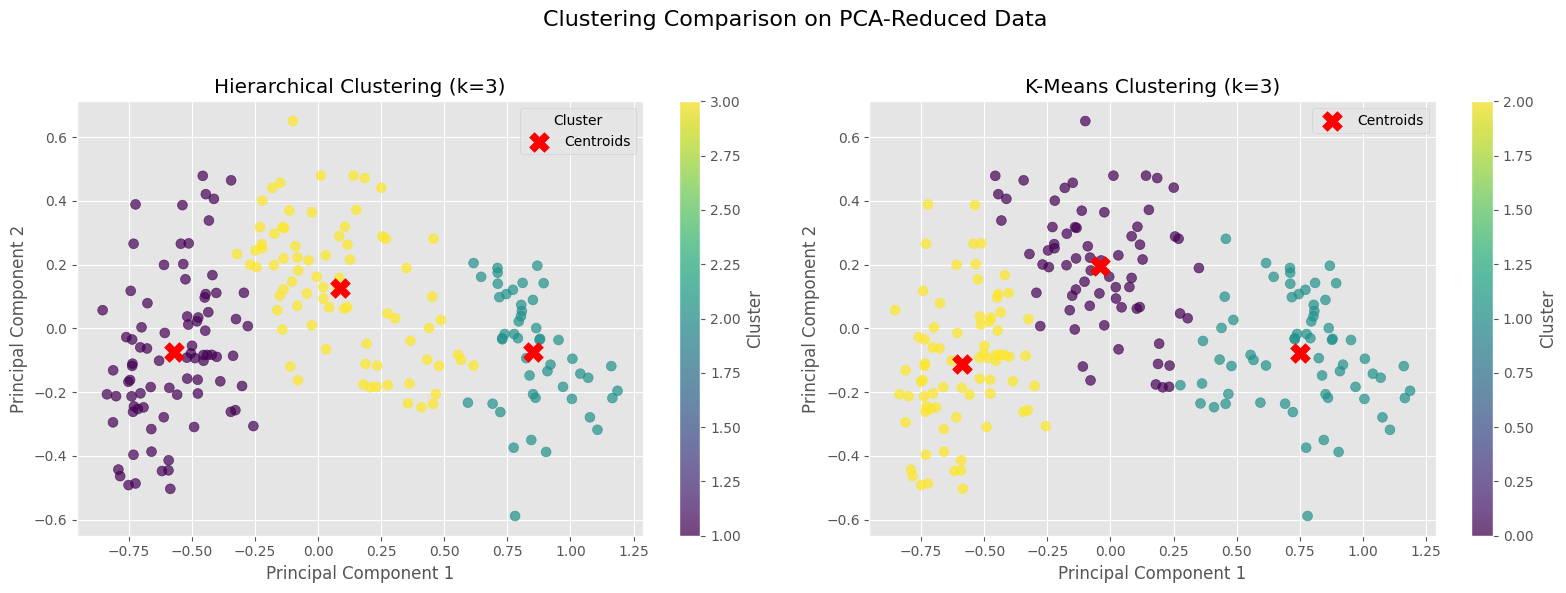

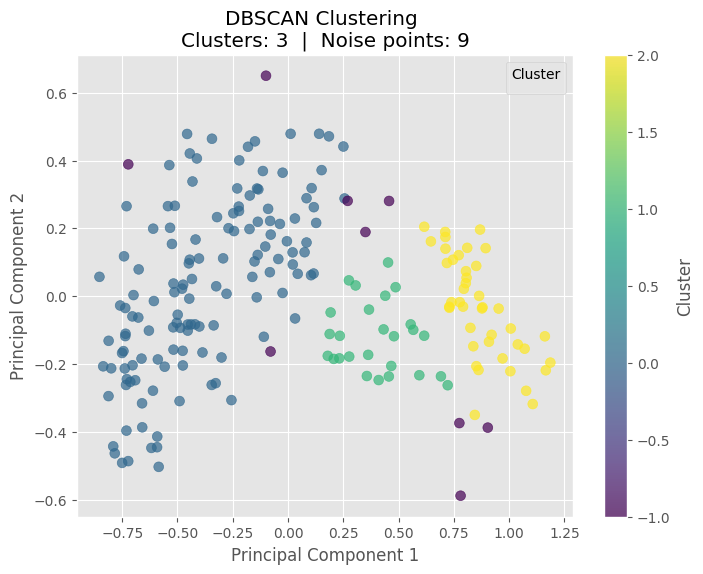

In [73]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# hierarchical clustering
Z = linkage(pca_df[['PC1', 'PC2']], method='ward')
hier_clusters = fcluster(Z, t=3, criterion='maxclust')
hier_centroids = np.array([
    pca_df[hier_clusters == i][['PC1', 'PC2']].mean(axis=0) for i in range(1, 4)
])

# kmeans clustering
k_best = 3
kmeans = KMeans(n_clusters=k_best, random_state=559990)
kmeans.fit(pca_df[['PC1', 'PC2']])
kmeans_labels = kmeans.labels_
kmeans_centroids = kmeans.cluster_centers_

# dbscan clustering
dbscan = DBSCAN(
    eps = 0.1379,
    min_samples = 5
)
dbscan.fit(X_pca)
dbscan_labels = dbscan.labels_
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)


fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Clustering Comparison on PCA-Reduced Data", fontsize=16)

# hierarchical plot
scatter1 = axes[0].scatter(
    pca_df['PC1'], pca_df['PC2'], c=hier_clusters, cmap='viridis', s=50, alpha=0.7
)
axes[0].scatter(hier_centroids[:, 0], hier_centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
axes[0].set_title('Hierarchical Clustering (k=3)')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].legend(title='Cluster')
axes[0].grid(True)
fig.colorbar(scatter1, ax=axes[0], label="Cluster")

# kmeans plot
scatter2 = axes[1].scatter(
    pca_df['PC1'], pca_df['PC2'], c=kmeans_labels, cmap='viridis', s=50, alpha=0.7
)
axes[1].scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
axes[1].set_title(f'K-Means Clustering (k={k_best})')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].legend()
axes[1].grid(True)
fig.colorbar(scatter2, ax=axes[1], label="Cluster")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
plot_dbscan(dbscan_labels, n_clusters, n_noise)

En las siguientes visualizaciones comparamos los resultados del agrupamiento usando Clustering Jerarquico, K-Means y DBSCAN sobre los datos de semillas reducidos con PCA.

K-Means genera clusters claros, compactos y bien separados, que se alinean bastante con la estructura aparente de los datos en 2D. Los centroides (marcados con una X roja) estan correctamente ubicados en el centro de cada cluster, y los grupos diferenciados por colores son mayoritariamente homogeneos y no se solapan. Esto coincide con los resultados cuantitativos, donde K-Means obtuvo el mejor rendimiento: Silhouette Score de 0.503, Davies-Bouldin Index de 0.697, y Calinski-Harabasz Score de 464.85. Estas metricas indican una buena cohesion interna dentro de los clusters y una buena separacion entre ellos, confirmando que K-Means capta correctamente la estructura del dataset.

Clustering Jerarquico tambien genera tres grupos, pero estos estan menos cohesionados que los de K-Means. Las fronteras entre clusters no son tan claras, y se observa mayor solapamiento visual entre grupos. Algunos puntos cercanos a los bordes parecen asignados de forma ambigua. Aunque los centroides estan razonablemente ubicados, no se encuentran tan centrados como en el caso de K-Means. Esto se refleja en las metricas: Silhouette Score de 0.471, Davies-Bouldin Index de 0.729 y Calinski-Harabasz Score de 396.49. Aunque aceptables, estos resultados indican que el metodo jerarquico es menos preciso a la hora de identificar clusters bien definidos en este caso.

En cambio, DBSCAN, con los parametros usados en esta configuracion, no logra separar los datos de forma significativa: asigna casi todos los puntos a un unico cluster y solo etiqueta 4 puntos como ruido. Visualmente, no se observa una separacion clara entre grupos, y el algoritmo basicamente trata todo el conjunto de datos como una unica zona densa. Las metricas tambien reflejan este mal rendimiento: Silhouette Score de 0.384, Davies-Bouldin Index de 2.611 (muy alto), y Calinski-Harabasz Score de 147.99, todas indicando una mala calidad de agrupamiento. Esto sugiere que el enfoque basado en densidad de DBSCAN no se adapta bien a la escala o estructura de los datos reducidos por PCA con los valores actuales de eps y min_samples.

Tanto por inspeccion visual como por evaluacion cuantitativa, K-Means destaca claramente frente a Clustering Jerarquico y DBSCAN para este dataset. Proporciona la mejor separacion entre grupos, la cohesion interna mas solida y se ajusta bien al numero esperado de clases de semillas. Clustering Jerarquico es una alternativa razonable aunque menos precisa, y DBSCAN no logra identificar una estructura significativa bajo las condiciones probadas.

## Relacion entre los resultados de clustering con las clases de las semillas:

Ahora queremos analizar la pureza (purity) de los clusters comparandolos con las clases reales de las semillas que aparecen en la columna 'clase'. Calculamos la pureza de cada algoritmo de clustering para evaluar hasta que punto los grupos predichos coinciden con las clases reales del conjunto de datos.

La pureza mide el grado en que cada cluster contiene puntos de datos de una sola clase verdadera. Un valor de pureza alto indica que el algoritmo ha logrado agrupar correctamente puntos que pertenecen a la misma clase, a pesar de no tener acceso a las etiquetas durante el entrenamiento (ya que estamos en un problema no supervisado).

Para calcular la pureza, primero construimos una tabla de contingencia (tambien conocida como matriz de confusion), comparando las etiquetas de cluster predichas con las clases verdaderas. Cada fila representa un cluster predichoy cada columna representa una clase verdadera. El valor de cada celda indica cuantos puntos de datos pertenecen a esa combinacion cluster-clase

Usaremos la siguiente formula para calcular la pureza:

$$
\text{Purity} = \frac{1}{N} \sum_{k=1}^{K} \max_{j} \left| C_k \cap L_j \right|
$$


In [74]:
import numpy as np
from sklearn.metrics import confusion_matrix

def compute_purity(y_true, y_pred):
    contingency = confusion_matrix(y_true, y_pred)
    return np.sum(np.max(contingency, axis=1)) / np.sum(contingency)

purity_kmeans = compute_purity(y, kmeans_labels)
purity_hier = compute_purity(y, hierarchical_labels)
purity_dbscan = compute_purity(y, dbscan_labels)

print(f"K-Means Purity: {purity_kmeans:.3f}")
print(f"Hierarchical Purity: {purity_hier:.3f}")
print(f"DBSCAN Purity: {purity_dbscan:.3f}")


K-Means Purity: 0.890
Hierarchical Purity: 0.829
DBSCAN Purity: 0.824


Basandonos en los resultados de pureza, K-Means consigue la mayor alineacion con las clases reales de las semillas, con una pureza de 0.890, lo que indica que la mayoria de sus clusters estan dominados por una unica clase.

Clustering Jerarquico le sigue con una pureza ligeramente inferior de 0.829, mientras que DBSCAN obtiene el peor resultado con 0.824. Aunque la diferencia entre Jerarquico y DBSCAN es pequena, K-Means destaca claramente como el algoritmo que mejor logra la correspondencia entre clases reales y clusters, reforzando asi su superioridad general para este conjunto de datos.

## Analisis de boxplots:

### Boxplots de K-Means:

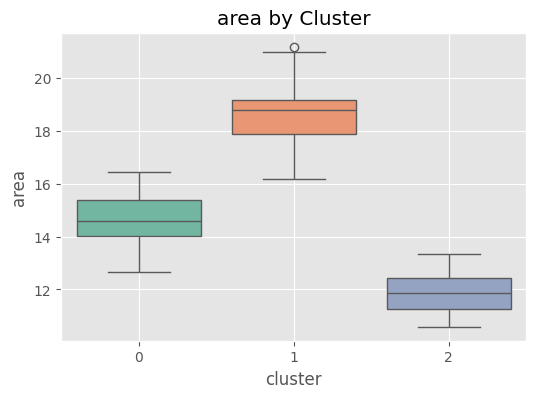

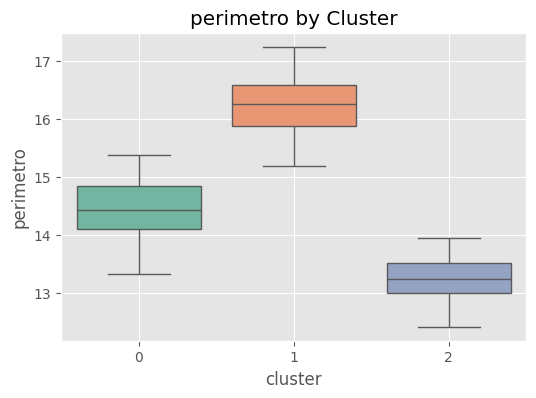

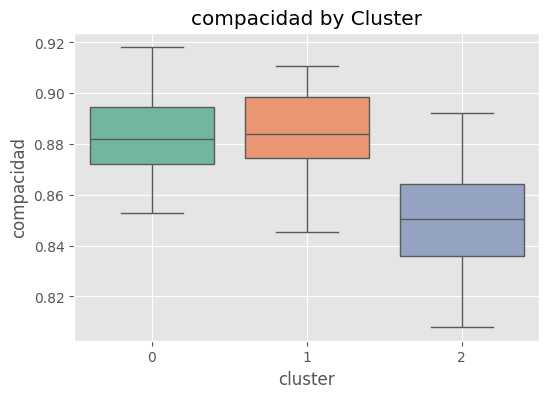

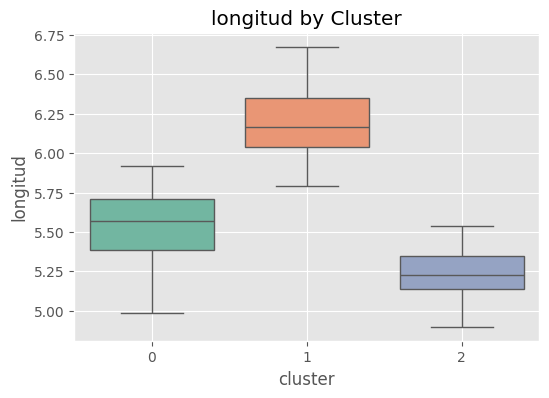

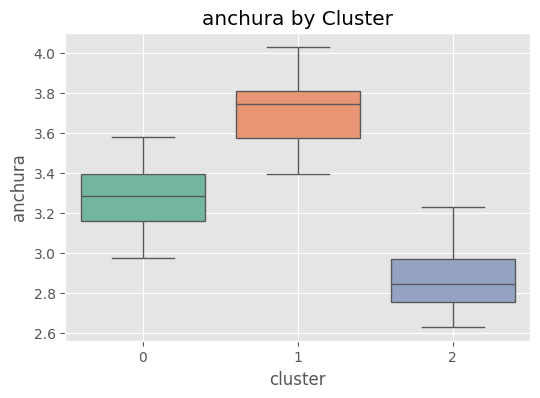

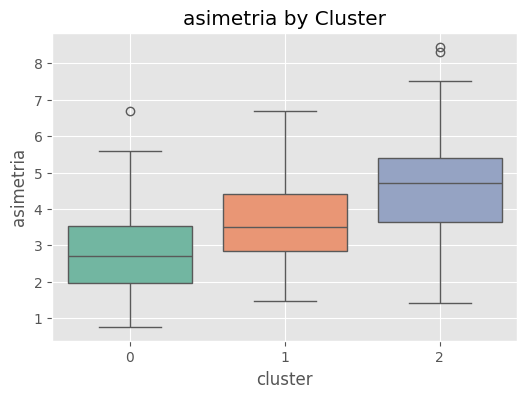

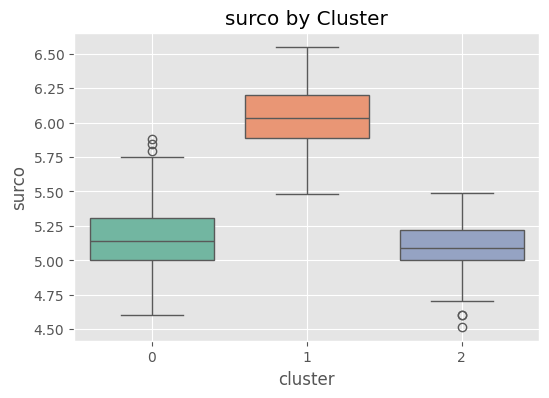

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

df_boxplot = df.copy()
df_boxplot['cluster'] = kmeans_labels
df_boxplot = df_boxplot.drop(columns=['clase'])

for col in df_boxplot.columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='cluster', y=col, data=df_boxplot, palette='Set2')
    plt.title(f'{col} by Cluster')
    plt.grid(True)
    plt.show()

Los boxplots muestran diferencias claras en la distribucion de las caracteristicas entre los clusters formados por K-Means, lo que respalda tanto la calidad como la interpretabilidad del agrupamiento.

El Cluster 1 presenta de forma consistente los valores mas altos en area, perimetro, longitud, anchura y longitud del surco, lo que sugiere que corresponde al tipo de semilla mas grande. El Cluster 2 muestra los valores mas bajos en estas mismas caracteristicas, por lo que probablemente representa las semillas mas pequenas, mientras que el Cluster 0 suele situarse en un punto intermedio.

Aunque variables como asimetria y compacidad muestran una mayor variabilidad, siguen aportando informacion util para diferenciar los grupos. En conjunto, la estructura de los clusters refleja variaciones significativas en los atributos originales de las semillas, lo cual concuerda con las diferencias biologicas esperadas entre los distintos tipos.

### Boxplots de Hierarchical:

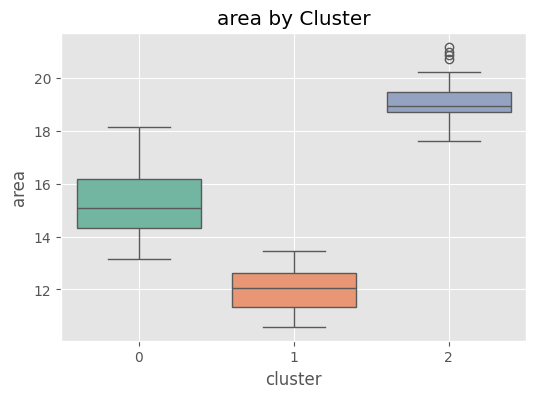

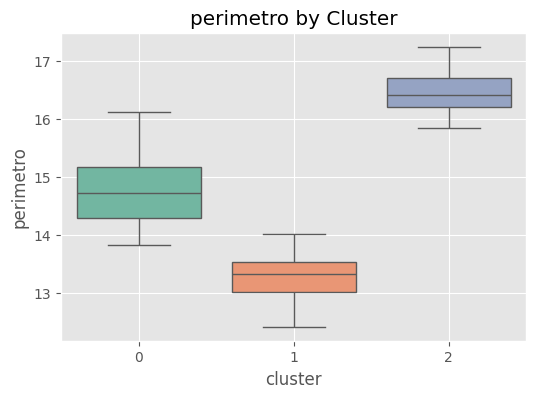

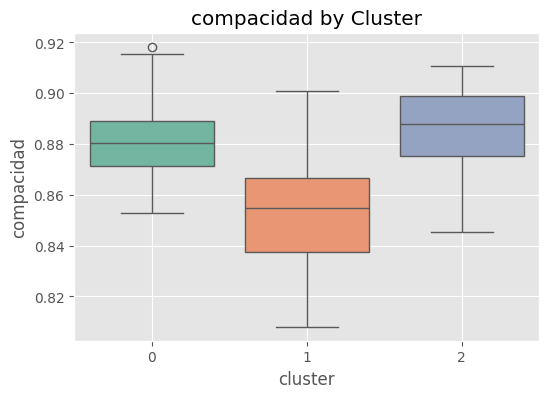

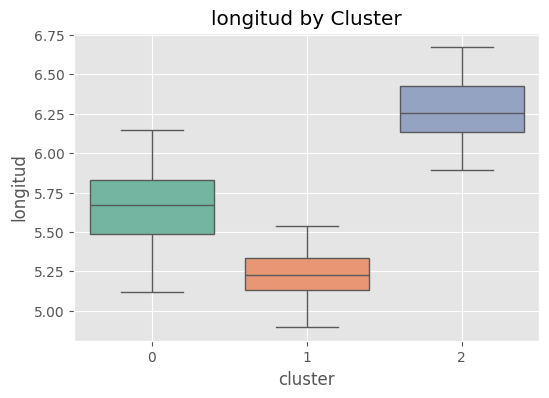

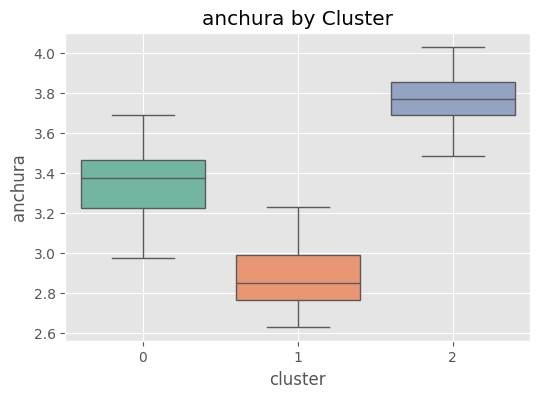

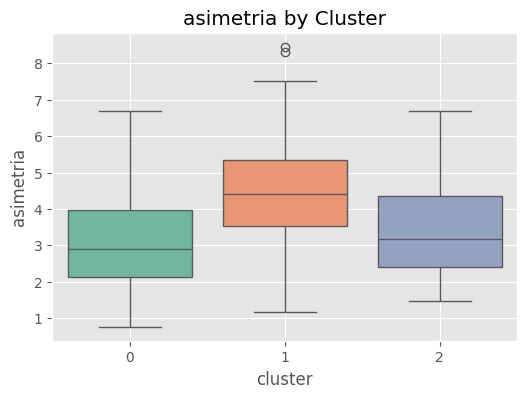

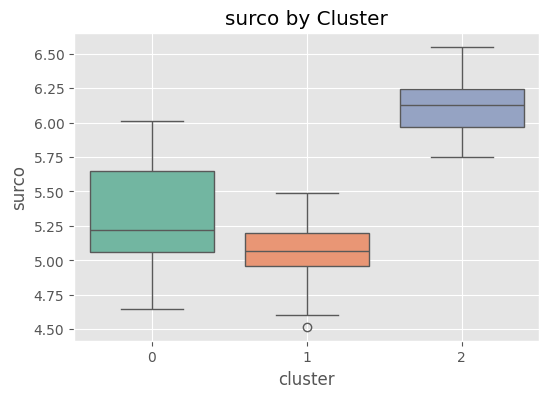

In [76]:
df_boxplot = df.copy()
df_boxplot['cluster'] = hierarchical_labels
df_boxplot = df_boxplot.drop(columns=['clase'])

for col in df_boxplot.columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='cluster', y=col, data=df_boxplot, palette='Set2')
    plt.title(f'{col} by Cluster')
    plt.grid(True)
    plt.show()

Los boxplots para el Clustering Jerarquico muestran que los clusters capturan algunas diferencias relevantes entre las caracteristicas, pero con mayor solapamiento y menor separacion en comparacion con K-Means.

El Cluster 2 destaca por tener los valores mas altos en area, perimetro, longitud, anchura y longitud del surco, lo que sugiere que probablemente representa el tipo de semilla mas grande. El Cluster 1 tiende a mostrar los valores mas bajos en area, perimetro y longitud, aunque sus distribuciones suelen solaparse con las del Cluster 0.

Caracteristicas como la asimetria y la compacidad muestran menos diferencia entre clusters, lo que indica que el Clustering Jerarquico fue menos eficaz a la hora de aislar variaciones en estos atributos.

En general, aunque el agrupamiento refleja cierta estructura en los datos, la separacion entre grupos es menos clara y consistente que la observada en los resultados de K-Means.

### Boxplots de DBSCAN:

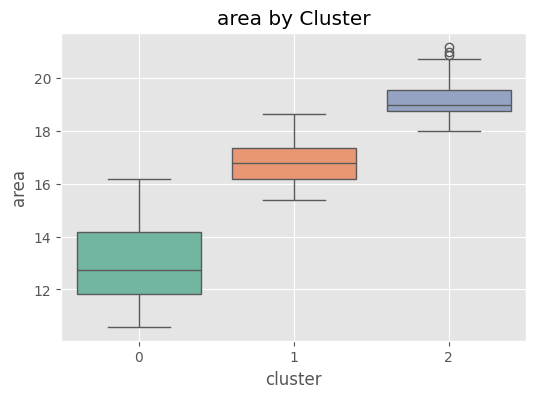

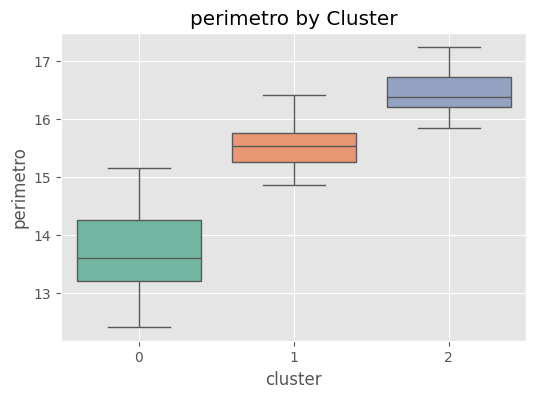

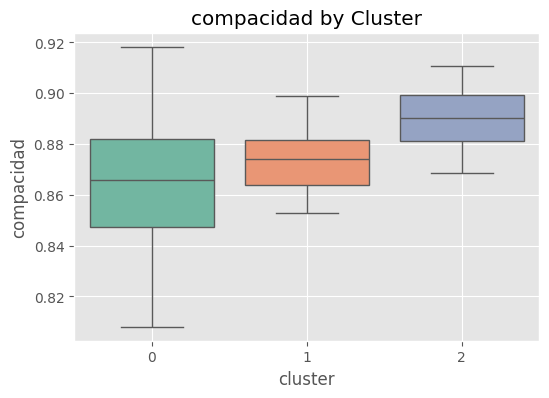

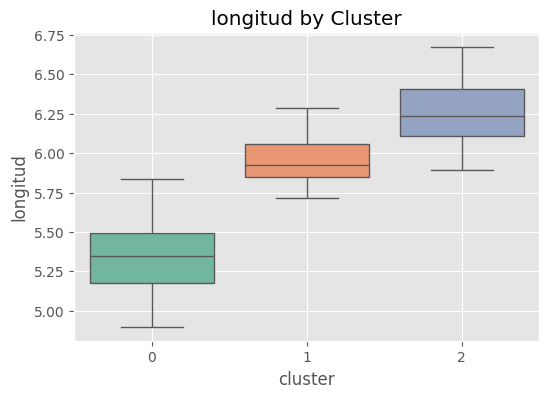

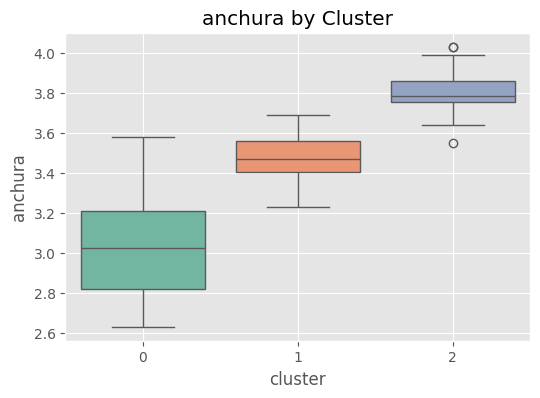

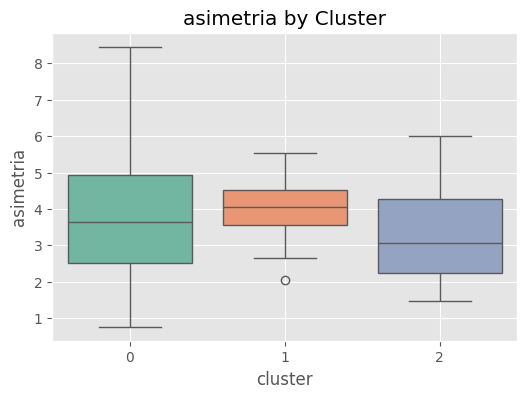

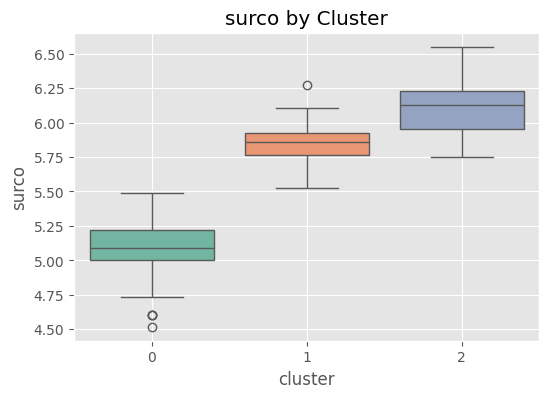

In [77]:
df_boxplot = df.copy()
df_boxplot['cluster'] = dbscan_labels
df_boxplot = df_boxplot[df_boxplot['cluster'] != -1] #aqui tenemos q quitar los puntos de noise prq se consideran como otro cluster
df_boxplot = df_boxplot.drop(columns=['clase'])

for col in df_boxplot.columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='cluster', y=col, data=df_boxplot, palette='Set2')
    plt.title(f'{col} by Cluster')
    plt.grid(True)
    plt.show()

Los boxplots para DBSCAN muestran que los clusters presentan cierta diferenciacion relevante en la mayoria de las caracteristicas, pero la separacion es menos clara y mas variable en comparacion con K-Means y Clustering Jerarquico.

El Cluster 2 tiende a tener los valores mas altos en area, perimetro, longitud, longitud del surco y anchura, lo que sugiere que representa el tipo de semilla mas grande. El Cluster 0 muestra generalmente los valores mas bajos, mientras que el Cluster 1 se posiciona de forma intermedia en varias caracteristicas.

Sin embargo, hay mayor solapamiento entre clusters, especialmente en caracteristicas como compacidad y asimetria, donde las distribuciones no estan claramente separadas. Esto refleja la naturaleza menos estructurada de los limites de los clusters en DBSCAN y su mayor sensibilidad a los patrones basados en densidad, lo que en este caso da lugar a agrupamientos menos precisos a pesar de que logra identificar tres clusters.

# Declaracion de uso de Inteligencia Artificial Generativa:

Nosotros declaramos el uso de inteligencia artificial generativa para usos especificos en esta practica. En nuestro caso, utilizabamos IA generativa como ChatGPT para depurar nuestro codigo ya que implementaciones de algoritmos de clustering con la libreria sci-kit learn es algo con lo que no somo familiares con ello. Nos ha ayudado a resolver "bugs" que nos salia al realizar la optimizacion de los hiperparametros para estos algoritmos. Tambien nos ha ayudado a resforzar nuestros conocimientos de clase con mayor facilidad. Ha sido util en ayudandonos a crear grafos para representar los resultados de clustering ya que no tenemos muchas experienca o conocimientos sobre libreries como seaborn y matplotlib.
